In [1]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [2]:
dataname = "m4_quarterly_atm"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_quarterly_atm.


In [3]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_hourly', 'm4_monthly', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro']


In [4]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [5]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='3M'),
 'target': array([7407.412 , 7528.566 , 7374.709 , 7395.5146, 7654.008 , 7686.8477,
        7578.191 , 7904.3765, 7744.0493, 7889.909 , 7572.1113, 7526.693 ,
        7331.8457, 7433.141 , 7235.135 , 7278.0073, 6560.2314, 6958.5474,
        6635.4824, 6588.6646, 6679.074 , 6702.8555, 6636.5166, 6766.9473,
        6818.1665], dtype=float32),
 'feat_static_cat': array([1]),
 'source': SourceContext(source=Span(path=WindowsPath('C:/Users/TM/.mxnet/gluon-ts/datasets/m4_quarterly_atm/train/m4_quarterly_train.json'), line=1), row=1)}

## Plot Series

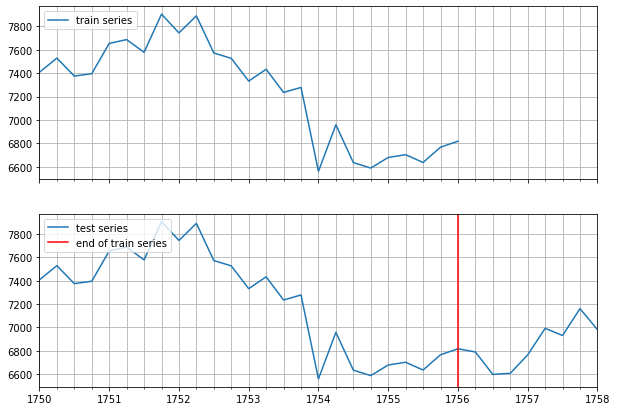

In [6]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [8]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_quarterly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.89it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 5.750 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.259157
0it [00:00, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 1230523
807it [00:25, 31.24it/s, validation_avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 25.844 seconds
INFO:root:Epoch[0] Evaluation metric 'validation_epoch_loss'=7.688883
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 16.84it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[1] Elapsed time 2.973 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.754561
767it [00:22, 34.41it/s, validation_avg_epoch_loss=7.58]
INFO:root:Epoch[1] Elapsed time 22.293 seconds
INFO:root:Epoch[1] Evaluation metric 'validation_epoch_loss'=7.578535
INFO:

INFO:root:Epoch[40] Elapsed time 25.426 seconds
INFO:root:Epoch[40] Evaluation metric 'validation_epoch_loss'=6.768497
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.12it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[41] Elapsed time 5.490 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.828820
764it [00:40, 19.05it/s, validation_avg_epoch_loss=6.93]
INFO:root:Epoch[41] Elapsed time 40.119 seconds
INFO:root:Epoch[41] Evaluation metric 'validation_epoch_loss'=6.926699
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 10.12it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[42] Elapsed time 4.951 seconds
INFO:root:Epoch[42] Evaluation metric 'epoch_loss'=6.840706
747it [00:25, 29.67it/s, validation_avg_epoch_loss=6.8] 
INFO:root:Epoch[42] Elapsed time 25.199 seconds
INFO:root:Epoch[42] Evaluation metric 'validation_epoch_loss'=6.798089
INFO:root:Epoch[43] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.84it/s, 

100%|██████████| 50/50 [00:04<00:00, 12.45it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[82] Elapsed time 4.024 seconds
INFO:root:Epoch[82] Evaluation metric 'epoch_loss'=6.639214
752it [00:25, 29.59it/s, validation_avg_epoch_loss=6.83]
INFO:root:Epoch[82] Elapsed time 25.416 seconds
INFO:root:Epoch[82] Evaluation metric 'validation_epoch_loss'=6.832976
INFO:root:Epoch[83] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 12.35it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[83] Elapsed time 4.057 seconds
INFO:root:Epoch[83] Evaluation metric 'epoch_loss'=6.600936
764it [00:30, 25.23it/s, validation_avg_epoch_loss=6.65]
INFO:root:Epoch[83] Elapsed time 30.286 seconds
INFO:root:Epoch[83] Evaluation metric 'validation_epoch_loss'=6.654468
INFO:root:Epoch[84] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 12.61it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[84] Elapsed time 3.981 seconds
INFO:root:Epoch[84] Evaluation metric 'epoch_loss'=6.873731
753it [00:26, 28.96it/s, validation

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.313723  0.108961  12.328702            0.103055             0.06128   

   seed  epochs  num_batches  
0    42     100           50  
Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_quarterly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.34it/s, avg_epoch_loss=8.1]
INFO:root:Epoch[0] Elapsed time 4.423 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.096983
0it [00:00, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 1230523
820it [00:30, 27.27it/s, validation_avg_epoch_loss=7.67]
INFO:root:Epoch[0] Elapsed time 30.073 seconds
INFO:root:Epoch[0] Evaluation metric 'validation_epoch_loss'=7.667339
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 13.01it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[1] Elapsed time 3.851 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.754693
752it [00:29, 25.91it/s, validation_avg_epoch_loss=7.55]
INFO:root:Epoch[1] Elapsed time 29.043 seconds
INFO:root:Epoch[1] Evaluation metric 'validation_epoch_loss'=7.547825
INFO:r

INFO:root:Epoch[40] Elapsed time 19.109 seconds
INFO:root:Epoch[40] Evaluation metric 'validation_epoch_loss'=6.769562
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 16.72it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[41] Elapsed time 2.991 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.593194
753it [00:19, 37.70it/s, validation_avg_epoch_loss=6.73]
INFO:root:Epoch[41] Elapsed time 19.978 seconds
INFO:root:Epoch[41] Evaluation metric 'validation_epoch_loss'=6.728377
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.18it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[42] Elapsed time 4.470 seconds
INFO:root:Epoch[42] Evaluation metric 'epoch_loss'=6.619715
749it [00:24, 31.07it/s, validation_avg_epoch_loss=6.82]
INFO:root:Epoch[42] Elapsed time 24.109 seconds
INFO:root:Epoch[42] Evaluation metric 'validation_epoch_loss'=6.818262
INFO:root:Epoch[43] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 12.30it/s, 

INFO:root:Epoch[82] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 13.39it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[82] Elapsed time 3.745 seconds
INFO:root:Epoch[82] Evaluation metric 'epoch_loss'=6.803106
748it [00:29, 24.98it/s, validation_avg_epoch_loss=6.66]
INFO:root:Epoch[82] Elapsed time 29.945 seconds
INFO:root:Epoch[82] Evaluation metric 'validation_epoch_loss'=6.661521
INFO:root:Epoch[83] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 13.33it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[83] Elapsed time 3.755 seconds
INFO:root:Epoch[83] Evaluation metric 'epoch_loss'=6.395459
753it [00:24, 30.74it/s, validation_avg_epoch_loss=6.64]
INFO:root:Epoch[83] Elapsed time 24.500 seconds
INFO:root:Epoch[83] Evaluation metric 'validation_epoch_loss'=6.640994
INFO:root:Epoch[84] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 12.79it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[84] Elapsed time 3.924 seconds
INFO:root:Epoch[84] Evaluation metric 'epoch_loss'

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.287426  0.107115  12.61024            0.101107            0.057707    43   

   epochs  num_batches  
0     100           50  
Seed: 44


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_quarterly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.98it/s, avg_epoch_loss=8.5]
INFO:root:Epoch[0] Elapsed time 3.130 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.499864
0it [00:00, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 1230523
816it [00:21, 38.59it/s, validation_avg_epoch_loss=7.73]
INFO:root:Epoch[0] Elapsed time 21.161 seconds
INFO:root:Epoch[0] Evaluation metric 'validation_epoch_loss'=7.728180
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 16.54it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[1] Elapsed time 3.024 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.730282
761it [00:21, 36.09it/s, validation_avg_epoch_loss=7.57]
INFO:root:Epoch[1] Elapsed time 21.101 seconds
INFO:root:Epoch[1] Evaluation metric 'validation_epoch_loss'=7.566229
INFO:r

INFO:root:Epoch[40] Elapsed time 22.855 seconds
INFO:root:Epoch[40] Evaluation metric 'validation_epoch_loss'=6.901196
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 15.46it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[41] Elapsed time 3.252 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.628428
760it [00:20, 37.19it/s, validation_avg_epoch_loss=6.84]
INFO:root:Epoch[41] Elapsed time 20.434 seconds
INFO:root:Epoch[41] Evaluation metric 'validation_epoch_loss'=6.837494
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 12.23it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[42] Elapsed time 4.097 seconds
INFO:root:Epoch[42] Evaluation metric 'epoch_loss'=6.817220
758it [00:23, 31.65it/s, validation_avg_epoch_loss=6.77]
INFO:root:Epoch[42] Elapsed time 23.959 seconds
INFO:root:Epoch[42] Evaluation metric 'validation_epoch_loss'=6.773634
INFO:root:Epoch[43] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.00it/s, 

INFO:root:Epoch[82] Learning rate is 0.0005
100%|██████████| 50/50 [00:03<00:00, 14.88it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[82] Elapsed time 3.366 seconds
INFO:root:Epoch[82] Evaluation metric 'epoch_loss'=6.534171
761it [00:28, 26.92it/s, validation_avg_epoch_loss=6.62]
INFO:root:Epoch[82] Elapsed time 28.278 seconds
INFO:root:Epoch[82] Evaluation metric 'validation_epoch_loss'=6.618782
INFO:root:Epoch[83] Learning rate is 0.0005
100%|██████████| 50/50 [00:06<00:00,  7.63it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[83] Elapsed time 6.558 seconds
INFO:root:Epoch[83] Evaluation metric 'epoch_loss'=6.527196
760it [01:04, 11.75it/s, validation_avg_epoch_loss=6.64]
INFO:root:Epoch[83] Elapsed time 64.707 seconds
INFO:root:Epoch[83] Evaluation metric 'validation_epoch_loss'=6.638192
INFO:root:Epoch[84] Learning rate is 0.0005
100%|██████████| 50/50 [00:04<00:00, 11.95it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[84] Elapsed time 4.196 seconds
INFO:root:Epoch[84] Evaluation metric 'epoch_los

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.407203  0.110277  12.376633            0.101538            0.062119   

   seed  epochs  num_batches  
0    44     100           50  
Wall time: 3h 17min 35s


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.313723,0.108961,12.328702,0.103055,0.061280,42,100,50
0,1.287426,0.107115,12.610240,0.101107,0.057707,43,100,50
0,1.407203,0.110277,12.376633,0.101538,0.062119,44,100,50


In [13]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly_atm", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

In [12]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly_dates", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly_atm", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [ ]:
%%time
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly_dates", seed=i, epochs=100, batches=100)
    pprint(df)
    results = results.append(df)

results

In [14]:
!jupyter nbconvert --output-dir="./html_outputs" --to html GluonTS10-own-m4_subsets.ipynb

[NbConvertApp] Converting notebook GluonTS10-own-m4_subsets.ipynb to html
[NbConvertApp] Writing 472281 bytes to ./html_outputs\GluonTS10-own-m4_subsets.html
